# Clustering Donor Behavior in Nonprofit Transactions

Project Overview

This project aims to analyze transactional donation data to uncover meaningful insights about donor behavior through segmentation. Using the K-means clustering algorithm, the project identifies distinct donor groups based on donation patterns, frequency, and other relevant behavioral metrics. These insights enable nonprofits to:
1.  **Understand Donor Behavior:** Gain deeper knowledge of donor preferences, habits, and trends.
2.	**Tailor Engagement Strategies:** Develop personalized marketing campaigns and communication plans that resonate with specific donor segments.
3.	**Improve Donor Retention:** Identify at-risk donors and create strategies to re-engage them effectively.
4.	**Optimize Fundraising Efforts:** Allocate resources strategically to maximize the impact of fundraising activities.
5.	**Enhance Long-Term Relationships:** Build stronger connections with donors by aligning with their interests and values.

The project incorporates data preprocessing, exploratory data analysis (EDA), and visualizations to ensure robust data preparation and intuitive understanding of patterns. Advanced clustering techniques are applied to segment donors based on key attributes such as:
-	Donation frequency
-	Donation amount
-	Recency of donations
-	Campaign-specific behaviors

In addition to the analytical focus, the project evaluates the quality of clustering using metrics like elbow, silhouette scores and inertia to ensure meaningful and actionable groupings.


## Objectives
- To explore donation patterns and donor behavior.
- To apply K-means clustering for segmenting donors based on their recency, frequency, and monetary value.
- To provide actionable insights for nonprofit organizations to enhance their fundraising strategies.

## Dataset
- **Source:** This dataset is derived from real transactional donation data but has been transformed into synthetic data and anonymized to ensure privacy. Real data points have been combined with generated fake data to protect sensitive information while maintaining realistic patterns for analysis. Also, the data has been previusly prepared for analysis use.
- **Fields:**
  - `donor_id`: A unique identifier for each donor. This field helps to track individual donors across multiple donations.
  - `donation_date`: The date when the donation was made. Useful for analyzing donation trends over time.
  - `payment_type`: The method used for the donation (e.g., Credit Card, Cash). Useful for understanding payment preferences among donors.
  - `donation`: The amount donated by the donor in a specific transaction. Important for tracking the financial contribution of each donor.
  - `campaign`: The specific fundraising campaign associated with the donation. Useful for analyzing which campaigns are most effective or popular.
  - **Engineered Fields:**
    - `recency`: Days since the last donation by donor.
    - `frequency`: Number of donations in a specific period by donor.
    - `total_donations`: Total donation amount by donor.

## Technologies Used
- **Programming Language:** Python
- **Libraries:**
  - Data Manipulation: Pandas, NumPy
  - Data Visualization: Matplotlib, Seaborn
  - Machine Learning: Scikit-learn
- **Development Environment:** Jupyter Notebook

## Steps Followed
1. **Data Preprocessing:**
   - Cleaned the dataset by handling missing values and outliers.
   - Normalized features for clustering.
2. **Exploratory Data Analysis (EDA):**
   - Visualized donation trends, recency, frequency, and monetary distributions.
3. **Feature Engineering:**
   - Created features like Recency, Frequency, and Monetary Value for clustering.
4. **K-means Clustering:**
   - Determined the optimal number of clusters using the Elbow method.
   - Segmented donors into distinct clusters.
5. **Cluster Analysis:**
   - Interpreted each cluster and its characteristics.
6. **Recommendations:**
   - Suggested personalized strategies for donor engagement based on cluster insights.

## Key Insights
- Donors were segmented into [e.g., "high-value donors," "frequent donors," "low-engagement donors"].
- Strategies for engagement vary significantly between clusters, enabling nonprofits to allocate resources more effectively.


### Importing libraries

| Library/Module      | Purpose                                      |
|---------------------|----------------------------------------------|
| `pandas`            | Data manipulation and analysis.             |
| `numpy`             | Numerical computations.                     |
| `random`            | Random number generation.                   |
| `string`            | String manipulation tools.                  |
| `matplotlib.pyplot` | Data visualization.                         |
| `seaborn`           | Statistical graphics.                       |
| `scipy.stats`       | Statistical functions and probability.      |
| `sklearn.cluster`   | Machine learning (K-Means clustering).      |
| `sklearn.preprocessing` | Scaling and transforming data.          |
| `sklearn.metrics`   | Performance evaluation.                     |
| `sklearn_extensions`| Additional tools for Scikit-learn.          |

In [1]:
!pip install sklearn_extensions
#!pip install sklearn.datasets.samples_generator

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 13.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 12.9 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Created wheel for sklearn_extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24309 sha256=9cf23e97f9b9b2010c9f5ee14913cec7c5094ccf46e899962887bd94b15809cd
  Stored in directory: /Users/jamesmontoya/Library/Caches/pip/wheels/1e/4a/c8/ced850f751b33dfdedb26ae8eb2a2d7b18029de2a2873ae72c
Successfully built sklearn_extensions


In [8]:
## Importing libraries for data Extraction and Transformations Analysis
import pandas as pd
import numpy as np
import random
import string

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import sklearn_extensions as ske
from sklearn.metrics import silhouette_score


## Reading the data

In [9]:
df_donations = pd.read_excel('../data/donations.xlsx')
df_donations.head(5)

,donor_id,donation_date,payment_type,donation,campaing
0,007dummyid1337,01-07-2018,Credit Card,25,camp-Regular
1,007dummyid1569,15-12-2019,Credit Card,50,camp-Regular
2,007dummyid0190,15-12-2023,Credit Card,10,camp-Regular
3,007dummyid0763,01-01-2021,Credit Card,10,camp-Regular
4,007dummyid1964,25-11-2020,Cash,10,camp-2020-Christmas- Request


In [10]:

df_donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63614 entries, 0 to 63613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   donor_id       63614 non-null  object
 1   donation_date  63614 non-null  object
 2   payment_type   60411 non-null  object
 3   donation       63614 non-null  int64 
 4   campaing       63614 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


### Converting data types

In [13]:
df_donations['donor_id'] = df_donations['donor_id'].astype('str')  # Convert to string
df_donations['donation_date'] = pd.to_datetime(df_donations['donation_date'], format="%d-%m-%Y")  # Convert to date
df_donations['payment_type'] =  df_donations['payment_type'].astype('str')   # Convert to str
df_donations['donation'] =  df_donations['donation'].astype('float')   # Convert to float
df_donations['campaing'] =  df_donations['campaing'].astype('str')   # Convert to str

df_donations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63614 entries, 0 to 63613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   donor_id       63614 non-null  object        
 1   donation_date  63614 non-null  datetime64[ns]
 2   payment_type   63614 non-null  object        
 3   donation       63614 non-null  float64       
 4   campaing       63614 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.4+ MB


In [18]:
# Count nulls or NaN values for each column
null_counts = df_donations.isnull().sum()
print(null_counts)

donor_id         0
donation_date    0
payment_type     0
donation         0
campaing         0
dtype: int64


## EDA Exploratory Data Analysis

Initial observations of the dataset focus on analyzing the features to identify potential outliers and understand the overall data distribution across the entire dataset

In [19]:
df_donations.describe()

,donation_date,donation
count,63614,63614.000000
mean,2021-11-02 00:51:01.363850752,160.323907
min,2018-07-01 00:00:00,0.000000
25%,2020-06-15 00:00:00,20.000000
50%,2021-11-10 00:00:00,35.000000
75%,2023-04-15 00:00:00,55.000000
max,2024-10-25 00:00:00,770000.000000
std,NaN,4490.549365


The donation feature contains 63,614 recorded transactions, with an average donation amount of $160.32. However, the median donation is $35.00, indicating a positive skew in the data caused by a few exceptionally large contributions, such as the maximum donation of $770,000. Most donations fall within the range of $20.00 (25th percentile) to $55.00 (75th percentile), showing that smaller contributions dominate the dataset. The high standard deviation of $4,490.55 further highlights the variability in donation amounts due to significant outliers. These outliers should be has a diferently process to ensure they do not disproportionately affect analytical results, such as clustering or segmentation analyses.

## Featuring Engineering

The following features are derived from the fields available in the dataset. While not all of them will be used in the cluster analysis, they have been retained to allow for deeper exploration and to uncover additional relevant insights in the future.

| **Field Name**                    | **Description**                                                                                               |
|------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **days_since_last_donation**       | The number of days between the last donation date and the most recent donation date for the donor.            |
| **months_since_last_donation**     | The number of months (approximated by dividing days by 30) since the last donation for the donor.             |
| **tenure_in_months**               | The total number of months the donor has been active, calculated from their first to the last donation date.  |
| **avg_days_between_donations**     | The average number of days between consecutive donations. If there is only one donation, it defaults to -1.   |
| **min_amount**                     | The smallest donation amount made by the donor.                                                              |
| **max_amount**                     | The largest donation amount made by the donor.                                                               |
| **avg_amount**                     | The average donation amount made by the donor.                                                               |
| **median_amount**                  | The median donation amount made by the donor.                                                                |
| **frequency**                      | The total number of donations made by the donor.                                                             |
| **recency**                        | The number of days since the most recent donation, calculated as the difference between the report date and the last donation date. |
| **total_donation**                 | The sum of all donation amounts made by the donor.                                                           |
| **first_donation_date**            | The date of the donor's first recorded donation.                                                             |
| **last_donation_date**             | The date of the donor's most recent recorded donation.                                                       |
| **Loyal Donor Indicator**          | A binary indicator (1/0) showing if the donor has donated in multiple years (1 if donated in at least two years). |
| **Retention Rate**                 | The percentage of years the donor has donated, calculated as the number of unique donation years divided by the latest donation year. |
| **Churn Rate**                     | The percentage of years the donor has not donated, calculated as `1 - Retention Rate`.                       |
| **Year-over-Year Donation Growth** | The average year-over-year percentage growth in donation amounts. Defaults to 0 if there is only one donation. |
| **Projected Donor Tenure (years)** | The projected tenure of the donor in years, calculated from the first to the last donation date divided by 365. |

In [21]:

# Sort data by Contact ID and Close Date to calculate time differences correctly
df_trans_tbl = df_donations.sort_values(['donor_id', 'donation_date'])
report_data = df_donations['donation_date'].max() #max date in the data to know the date of the report

df_features = df_trans_tbl.groupby('donor_id', group_keys=False).apply(lambda group: pd.Series({
    'days_since_last_donation': (group['donation_date'].max() - group['donation_date']).dt.days.iloc[-1],
    'months_since_last_donation': (group['donation_date'].max() - group['donation_date']).dt.days.iloc[-1] // 30,
    'tenure_in_months': (group['donation_date'].max() - group['donation_date'].min()).days // 30,
    'avg_days_between_donations': group['donation_date'].diff().dt.days.mean() if group['donation_date'].count() > 1 else -1,
    
    'min_amount': group['donation'].min(),
    'max_amount': group['donation'].max(),
    'avg_amount': group['donation'].mean(),
    'median_amount': group['donation'].median(),
    
    # Features for Clustering analysis
    'frequency': group['donation_date'].count(), # Count donations by donor
    'recency': (report_data - group['donation_date'].max()).days,
    'total_donation': group['donation'].sum(), # 
    
    # Donations dates
    'first_donation_date':group['donation_date'].min(),
    'last_donation_date':group['donation_date'].max(),
    
    # New fields added below
    'Loyal Donor Indicator': int(group['donation_date'].dt.year.nunique() >= 2),  # 1 if donated in multiple years
    'Retention Rate': (group['donation_date'].dt.year.nunique() / group['donation_date'].dt.year.max()) if group['donation_date'].dt.year.max() else 0,
    'Churn Rate': 1 - ((group['donation_date'].dt.year.nunique() / group['donation_date'].dt.year.max()) if group['donation_date'].dt.year.max() else 0),
    'Year-over-Year Donation Growth': group['donation'].pct_change().dropna().mean() if group['donation'].count() > 1 else 0,  # Average YoY growth rate in amount
    #'Lifetime Value (LTV)': group['Amount'].sum(),  # Total donations as LTV
    'Projected Donor Tenure (years)': (group['donation_date'].max() - group['donation_date'].min()).days / 365,
    

})).reset_index()

# Display the summary DataFrame
df_features.tail()

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_91892/2608630029.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features = df_trans_tbl.groupby('donor_id', group_keys=False).apply(lambda group: pd.Series({


,donor_id,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years)
5330,007dummyid5331,0,0,0,-1.0,50.0,50.0,50.0,50.0,1,31,50.0,2024-09-24,2024-09-24,0,0.000494,0.999506,0.0,0.000000
5331,007dummyid5332,0,0,0,-1.0,50.0,50.0,50.0,50.0,1,30,50.0,2024-09-25,2024-09-25,0,0.000494,0.999506,0.0,0.000000
5332,007dummyid5333,0,0,0,-1.0,781.0,781.0,781.0,781.0,1,50,781.0,2024-09-05,2024-09-05,0,0.000494,0.999506,0.0,0.000000
5333,007dummyid5334,0,0,0,-1.0,10000.0,10000.0,10000.0,10000.0,1,8,10000.0,2024-10-17,2024-10-17,0,0.000494,0.999506,0.0,0.000000
5334,007dummyid5335,0,0,3,105.0,500.0,1000.0,750.0,750.0,2,10,1500.0,2024-07-02,2024-10-15,0,0.000494,0.999506,1.0,0.287671


## Distribution of some features

In [42]:
columns = ['frequency', 'recency','total_donation']

df_des = df_features[columns]
df_des.describe()

,frequency,recency,total_donation
count,5335.000000,5335.000000,5.335000e+03
mean,11.923899,613.452484,1.911686e+03
std,21.054481,597.818606,3.779571e+04
min,1.000000,0.000000,2.000000e+00
25%,2.000000,121.000000,8.500000e+01
50%,4.000000,403.000000,2.500000e+02
75%,12.000000,1044.000000,8.600000e+02
max,621.000000,2294.000000,2.708064e+06


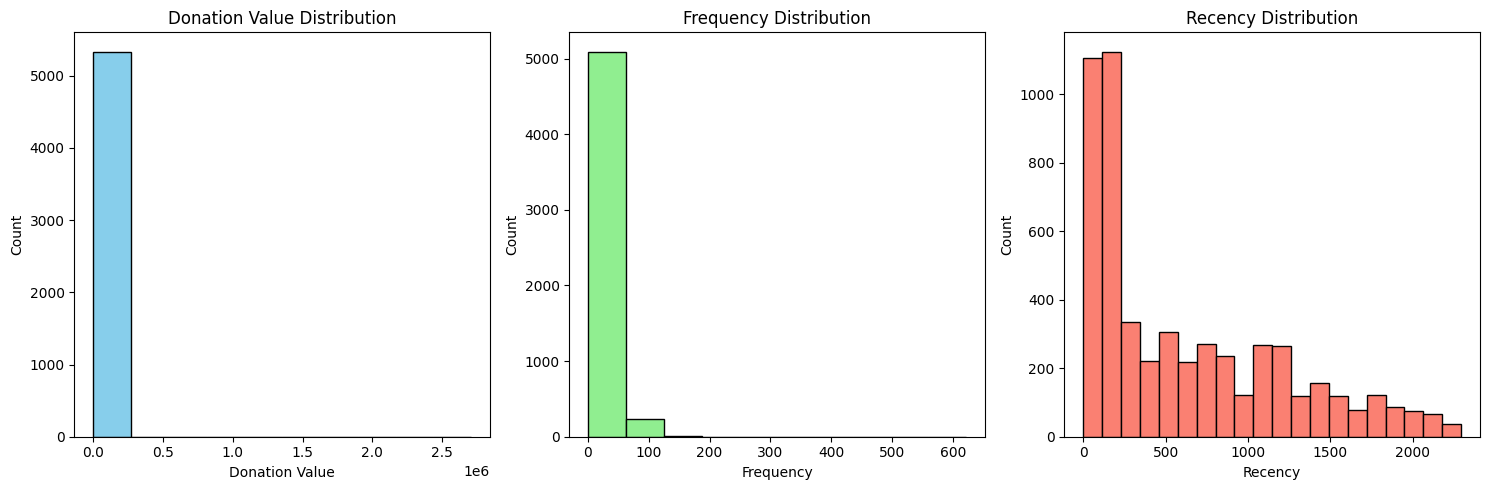

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_features['total_donation'], bins=10, color='skyblue', edgecolor='black')
plt.title('Donation Value Distribution')
plt.xlabel('Donation Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df_features['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df_features['recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observations

The dataset and charts shows significant variability across donors in terms of donation frequency, recency, and total donations. On average, donors have made approximately 12 donations, with 50% contributing 4 or fewer times, while a few outliers have donated as many as 621 times. The average time since the last donation is 613 days, with a wide range from very recent donors to those inactive for over 6 years. Total donation amounts are highly skewed, with an average of $1,911 but a median of just $250, indicating that most donors contribute relatively small amounts, while a few major donors significantly inflate the average (e.g., a maximum total donation of $2.7 million). These patterns highlight opportunities for segmentation, such as targeting low-frequency, high-recency donors for re-engagement and focusing retention efforts on loyal, high-frequency contributors.

## Checking boxplots for out-layers

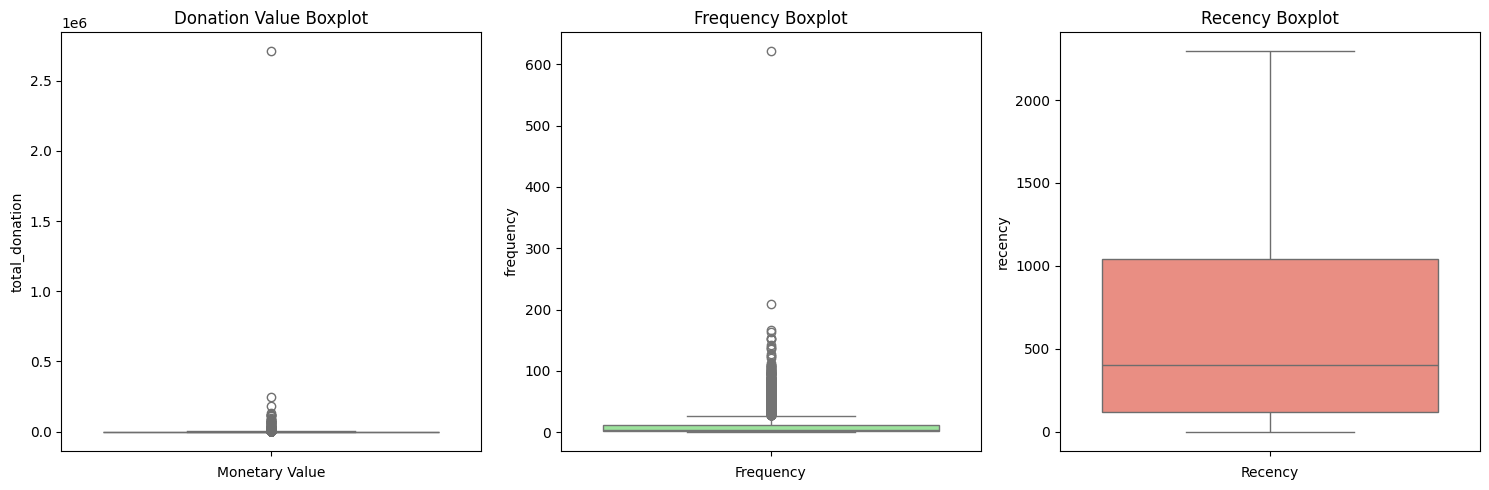

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_features['total_donation'], color='skyblue')
plt.title('Donation Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_features['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_features['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
M_Q1 = df_features["total_donation"].quantile(0.25)
M_Q3 = df_features["total_donation"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

donations_outliers_df = df_features[(df_features["total_donation"] > (M_Q3 + 1.5 * M_IQR)) | (df_features["total_donation"] < (M_Q1 - 1.5 * M_IQR))].copy()

donations_outliers_df.describe()

<bound method IndexOpsMixin.tolist of Index(['Mailing City', 'Mailing State', 'Mailing Postal Code',
       'Mailing Country', 'Deceased', 'Do Not Contact', 'Age', 'Gender',
       'RG Status', 'BQ Status', 'donor_id'],
      dtype='object')>

In [265]:
df_donors_tbl = df_donors[['donor_id','Mailing City', 'Mailing State', 'Mailing Postal Code',
       'Mailing Country', 'Deceased', 'Do Not Contact', 'Age', 'Gender',
       'RG Status', 'BQ Status']]
# Assume df is your DataFrame, and you want to rename 'old_column_name' to 'new_column_name'
df_donors_tbl = df_donors_tbl.rename(columns={'donor_id': 'Contact ID'})
df_donors_tbl


,Contact ID,Mailing City,Mailing State,Mailing Postal Code,Mailing Country,Deceased,Do Not Contact,Age,Gender,RG Status,BQ Status
0,007dJ610575HNGv,Warrnambool,VIC,3280,Australia,0,0,NaN,Female,Unknown,Unknown
1,007jS296453vDkm,Penshurst,NSW,2222,Australia,0,0,NaN,Female,Unknown,Unknown
2,007iu96480670br,Gladstone Park,VIC,3043,Australia,0,0,NaN,Female,Unknown,Unknown
3,007iw560154zN1l,Warwick,QLD,4370,Australia,0,0,NaN,Female,Unknown,Unknown
4,007FW496379NLBg,SOUTH PERTH,WA,6151,Australia,0,0,NaN,Male,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
23718,007eR413579TRhq,MERRYLANDS WEST,NSW,2160,Australia,0,0,NaN,Male,Unknown,Unknown
23719,007IS897117gZsD,MITTAGONG,NSW,2575,Australia,0,0,NaN,Female,Unknown,Unknown
23720,007ER3640144b8s,WEST LAKES SHORE,SA,5020,Australia,0,0,NaN,Male,Unknown,Unknown
23721,007vu889382rCAi,BRAY PARK,NSW,2484,Australia,0,0,NaN,Female,Active,Unknown


## table donatiosn final ready

In [266]:
df_donors_tbl

,Contact ID,Mailing City,Mailing State,Mailing Postal Code,Mailing Country,Deceased,Do Not Contact,Age,Gender,RG Status,BQ Status
0,007dJ610575HNGv,Warrnambool,VIC,3280,Australia,0,0,NaN,Female,Unknown,Unknown
1,007jS296453vDkm,Penshurst,NSW,2222,Australia,0,0,NaN,Female,Unknown,Unknown
2,007iu96480670br,Gladstone Park,VIC,3043,Australia,0,0,NaN,Female,Unknown,Unknown
3,007iw560154zN1l,Warwick,QLD,4370,Australia,0,0,NaN,Female,Unknown,Unknown
4,007FW496379NLBg,SOUTH PERTH,WA,6151,Australia,0,0,NaN,Male,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
23718,007eR413579TRhq,MERRYLANDS WEST,NSW,2160,Australia,0,0,NaN,Male,Unknown,Unknown
23719,007IS897117gZsD,MITTAGONG,NSW,2575,Australia,0,0,NaN,Female,Unknown,Unknown
23720,007ER3640144b8s,WEST LAKES SHORE,SA,5020,Australia,0,0,NaN,Male,Unknown,Unknown
23721,007vu889382rCAi,BRAY PARK,NSW,2484,Australia,0,0,NaN,Female,Active,Unknown


In [267]:
## Create table donor in Postgres

In [268]:
# Insert dataframe in postgres Write DataFrame to PostgreSQL table
df_donors_tbl.to_sql('tbl_donors', engine, schema='nonprofit', index=False, if_exists='replace')

723

## Process ETL for Extraction and transforming table transactions

In [269]:
df_transactions = pd.read_csv('../csv/ReportExample.csv')
df_transactions

,18-Character Contact ID,Serial Number,Contact ID,Close Date,Payment Type,Payment Channel,Opportunity Name,Amount,Primary Campaign Source,Primary Contact,Override Source Code,Source 2 (legacy),Payment Narrative,Destination Code,Age
0,003Ig000001UQjWIAW,29494.0,003Ig000001UQjW,1/7/2018,Credit Card,Mail,SOSJ Regular Giving - Anthony Bourke - 01/07/2018,25.0,SOSJ Regular Giving,Anthony Bourke,SOSJ_Regular_Giving,SOSJ,NaN,SOSJ,NaN
1,003Ig000001UQSDIA4,10019.0,003Ig000001UQSD,15/12/2019,Credit Card,Mail,MMT Regular Giving - Jill Murray - 15/12/2019,50.0,MMT Regular Giving,Jill Murray,MMT_REGULAR_GIVING,DG_Tax,NaN,Regular Giving 4-1405,NaN
2,003Ig000001UOUiIAO,27440.0,003Ig000001UOUi,15/12/2023,Credit Card,Recurring,MMT Regular Giving - Velimir Plavljanic - 15/1...,10.0,MMT Regular Giving,Velimir Plavljanic,MMT_REGULAR_GIVING,DG_Tax,NaN,Regular Giving 4-1405,82.0
3,003Ig000001UPZkIAO,33126.0,003Ig000001UPZk,1/1/2021,Credit Card,Mail,MMT Regular Giving - Doris Bastian - 01/01/2021,10.0,MMT Regular Giving,Doris Bastian,MMT_REGULAR_GIVING,DG_Tax,NaN,Regular Giving 4-1405,83.0
4,003Ig000001UR8WIAW,47246.0,003Ig000001UR8W,25/11/2020,Cash,NaN,2020 Christmas Appeal - Rosario Bustillos - 25...,10.0,2020 Christmas Appeal,Rosario Bustillos,20XW1_AW,DG_Tax,NaN,Direct Mail 4-1325,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63609,003Ig000001UQc1IAG,26159.0,003Ig000001UQc1,24/10/2024,NaN,Mail,2024 Spring Newsletter - Terry Hickling - 24/1...,200.0,2024 Spring Newsletter,Terry Hickling,NaN,NaN,24N3_MLD,Direct Mail 4-1325,NaN
63610,003Ig000001UVW3IAO,249301.0,003Ig000001UVW3,24/10/2024,NaN,Internet,Raisely Regular Giving - Jo-Ellen Reid - 24/10...,20.0,Raisely Regular Giving,Jo-Ellen Reid,NaN,NaN,NaN,Regular Giving 4-1405,NaN
63611,003Ig000001UTqTIAW,241816.0,003Ig000001UTqT,23/10/2024,NaN,Internet,2024 Spring Newsletter - Bianca Raiti - 23/10/...,100.0,2024 Spring Newsletter,Bianca Raiti,NaN,NaN,Thank you for all your help and guidance as we...,Direct Mail 4-1325,NaN
63612,003Ig000001UScaIAG,236800.0,003Ig000001USca,23/10/2024,NaN,Internet,2024 Spring Newsletter - Kai Ming Tsui - 23/10...,25.0,2024 Spring Newsletter,Kai Ming Tsui,NaN,NaN,AW\n$25 total - $0.60,Direct Mail 4-1325,NaN


In [270]:
print(df_transactions.isnull().sum())

18-Character Contact ID        0
Serial Number                 78
Contact ID                     0
Close Date                     0
Payment Type                3202
Payment Channel            14470
Opportunity Name               0
Amount                         0
Primary Campaign Source        0
Primary Contact              160
Override Source Code        2742
Source 2 (legacy)           3202
Payment Narrative          62342
Destination Code               0
Age                        37934
dtype: int64


In [271]:
df_transactions.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['18-Character Contact ID', 'Serial Number', 'Contact ID', 'Close Date',
       'Payment Type', 'Payment Channel', 'Opportunity Name', 'Amount',
       'Primary Campaign Source', 'Primary Contact', 'Override Source Code',
       'Source 2 (legacy)', 'Payment Narrative', 'Destination Code', 'Age'],
      dtype='object')>

In [272]:

df_transactions = df_transactions.drop(columns=['18-Character Contact ID', 'Serial Number', 'Age','Payment Narrative','Payment Channel','Primary Contact', 'Opportunity Name', 'Override Source Code',	'Source 2 (legacy)'])
df_transactions

,Contact ID,Close Date,Payment Type,Amount,Primary Campaign Source,Destination Code
0,003Ig000001UQjW,1/7/2018,Credit Card,25.0,SOSJ Regular Giving,SOSJ
1,003Ig000001UQSD,15/12/2019,Credit Card,50.0,MMT Regular Giving,Regular Giving 4-1405
2,003Ig000001UOUi,15/12/2023,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405
3,003Ig000001UPZk,1/1/2021,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405
4,003Ig000001UR8W,25/11/2020,Cash,10.0,2020 Christmas Appeal,Direct Mail 4-1325
...,...,...,...,...,...,...
63609,003Ig000001UQc1,24/10/2024,NaN,200.0,2024 Spring Newsletter,Direct Mail 4-1325
63610,003Ig000001UVW3,24/10/2024,NaN,20.0,Raisely Regular Giving,Regular Giving 4-1405
63611,003Ig000001UTqT,23/10/2024,NaN,100.0,2024 Spring Newsletter,Direct Mail 4-1325
63612,003Ig000001USca,23/10/2024,NaN,25.0,2024 Spring Newsletter,Direct Mail 4-1325


In [273]:
print(df_transactions.isnull().sum())

Contact ID                    0
Close Date                    0
Payment Type               3202
Amount                        0
Primary Campaign Source       0
Destination Code              0
dtype: int64


In [274]:
# Replace NaN values with appropriate values for each column
df_transactions['Payment Type'] = df_transactions['Payment Type'].fillna('Unknown')  # Replace with 'Unknown' or appropriate value
print(df_transactions.isnull().sum())

Contact ID                 0
Close Date                 0
Payment Type               0
Amount                     0
Primary Campaign Source    0
Destination Code           0
dtype: int64


## Merge table dummy id & Donors

In [275]:
# Merge df1 with df2 on 'Contact ID' to bring over the 'donor_id'
df_merge = df_transactions.merge(df_homo_donors[['Contact ID', 'donor_id']], on='Contact ID', how='left')

# Display the result data types
df_merge.dtypes

Contact ID                  object
Close Date                  object
Payment Type                object
Amount                     float64
Primary Campaign Source     object
Destination Code            object
donor_id                    object
dtype: object

## Converting data types

In [276]:
df_merge['Contact ID'] = df_merge['Contact ID'].astype('str')  # Convert to string
df_merge['Close Date'] = pd.to_datetime(df_merge['Close Date'], format="%d/%m/%Y")  # Convert to date
df_merge['Payment Type'] =  df_merge['Payment Type'].astype('str')   # Convert to str
df_merge['Payment Type'] =  df_merge['Payment Type'].astype('str')   # Convert to str
df_merge['Amount'] = df_merge['Amount'].astype('float')  # Convert to float
df_merge['Payment Type'] =  df_merge['Payment Type'].astype('str')   # Convert to str
df_merge['Primary Campaign Source'] =  df_merge['Primary Campaign Source'].astype('str')   # Convert to str
df_merge['Destination Code'] =  df_merge['Destination Code'].astype('str')   # Convert to str
df_merge['donor_id'] =  df_merge['donor_id'].astype('str')   # Convert to str

df_merge.dtypes

Contact ID                         object
Close Date                 datetime64[ns]
Payment Type                       object
Amount                            float64
Primary Campaign Source            object
Destination Code                   object
donor_id                           object
dtype: object

In [277]:
thresholds = df_merge['Amount'].quantile([0.2, 0.5, 0.8, 0.95, 0.99])
# Define categories dynamically based on these thresholds.
thresholds

0.20      20.0
0.50      35.0
0.80     100.0
0.95     250.0
0.99    1000.0
Name: Amount, dtype: float64

In [278]:
df_merge.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Contact ID', 'Close Date', 'Payment Type', 'Amount',
       'Primary Campaign Source', 'Destination Code', 'donor_id'],
      dtype='object')>

In [279]:
df_merge = df_merge.drop(columns=['Contact ID'])


df_trans_tbl = df_merge[['donor_id', 'Close Date', 'Payment Type', 
       'Amount', 'Primary Campaign Source', 'Destination Code']]

# Assume df is your DataFrame, and you want to rename 'old_column_name' to 'new_column_name'
df_trans_tbl = df_trans_tbl.rename(columns={'donor_id': 'Contact ID'})

# Define a function to categorize Gift Type based on amount ranges
def determine_gift_type(amount):
    if amount < 100:
        return "Small Gift (Under $100)"
    elif 100 <= amount < 1000:
        return "Major Gift ($100-$1K)"
    elif 1000 <= amount < 10000:
        return "Premium Gift ($1K-$10K)"
    elif 10000 <= amount < 100000:
        return "High-Value Gift ($10K-$100K)"
    elif 100000 <= amount < 1000000:
        return "Elite Gift ($100K-$1M)"
    else:
        return "Ultra Gift (Over $1M)"

# Apply the function to create the Gift Type column
df_trans_tbl['Gift Type'] = df_trans_tbl['Amount'].apply(determine_gift_type)

df_trans_tbl

,Contact ID,Close Date,Payment Type,Amount,Primary Campaign Source,Destination Code,Gift Type
0,007Xy920706u4YM,2018-07-01,Credit Card,25.0,SOSJ Regular Giving,SOSJ,Small Gift (Under $100)
1,007SK399425FUYE,2019-12-15,Credit Card,50.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100)
2,007te379926OZEt,2023-12-15,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100)
3,007SR035835xKt0,2021-01-01,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100)
4,007sg943147UotF,2020-11-25,Cash,10.0,2020 Christmas Appeal,Direct Mail 4-1325,Small Gift (Under $100)
...,...,...,...,...,...,...,...
63609,007HO372055PVlR,2024-10-24,Unknown,200.0,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K)
63610,007cf9822772xwT,2024-10-24,Unknown,20.0,Raisely Regular Giving,Regular Giving 4-1405,Small Gift (Under $100)
63611,007Oj4211963JXk,2024-10-23,Unknown,100.0,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K)
63612,007JU242777LYDk,2024-10-23,Unknown,25.0,2024 Spring Newsletter,Direct Mail 4-1325,Small Gift (Under $100)


In [280]:
# Giving Seasonality: Most common season for giving

## Extract the month from 'Close Date'
month = df_trans_tbl['Close Date'].dt.month

# Define conditions and choices for each season
conditions = [
    month.isin([12, 1, 2]),  # Summer: December, January, February
    month.isin([3, 4, 5]),   # Autumn: March, April, May
    month.isin([6, 7, 8]),   # Winter: June, July, August
    month.isin([9, 10, 11])  # Spring: September, October, November
]
choices = ['Summer', 'Autumn', 'Winter', 'Spring']

# Apply np.select to assign seasons based on month, with default as 'Unknown'
df_trans_tbl['Giving Seasonality'] = np.select(conditions, choices, default='Unknown')

# For dates

# Número del día del mes (1-31).
df_trans_tbl['day'] = df_trans_tbl['Close Date'].dt.day
# Month
df_trans_tbl['month'] = df_trans_tbl['Close Date'].dt.month
# year
df_trans_tbl['year'] = df_trans_tbl['Close Date'].dt.year
# name of day week (0=Monday, 6=Sunday)
df_trans_tbl['weekday'] = df_trans_tbl['Close Date'].dt.weekday

# name of dayweek
df_trans_tbl['weekday_name'] = df_trans_tbl['Close Date'].dt.day_name()

# number day of a week of year (1-52).
df_trans_tbl['week_of_year'] = df_trans_tbl['Close Date'].dt.isocalendar().week

# Identifica en qué trimestre cae la fecha (1, 2, 3, 4).
df_trans_tbl['quarter'] = df_trans_tbl['Close Date'].dt.quarter

# 	Indica si la fecha cae en un sábado o domingo.
df_trans_tbl['is_weekend'] = df_trans_tbl['Close Date'].dt.weekday.isin([5, 6])

# Age Group computation with missing values handled
# Define the bins and labels
#bins = [0, 18, 35, 50, 65, 90, 120]
#labels = ['0-18', '19-35', '36-50', '51-65', '66-90', '91+']

# Use pd.cut to create the 'Age Group' column
#df_trans_tbl['Age Group'] = pd.cut(df_trans_tbl['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the result
df_trans_tbl

,Contact ID,Close Date,Payment Type,Amount,Primary Campaign Source,Destination Code,Gift Type,Giving Seasonality,day,month,year,weekday,weekday_name,week_of_year,quarter,is_weekend
0,007Xy920706u4YM,2018-07-01,Credit Card,25.0,SOSJ Regular Giving,SOSJ,Small Gift (Under $100),Winter,1,7,2018,6,Sunday,26,3,True
1,007SK399425FUYE,2019-12-15,Credit Card,50.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100),Summer,15,12,2019,6,Sunday,50,4,True
2,007te379926OZEt,2023-12-15,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100),Summer,15,12,2023,4,Friday,50,4,False
3,007SR035835xKt0,2021-01-01,Credit Card,10.0,MMT Regular Giving,Regular Giving 4-1405,Small Gift (Under $100),Summer,1,1,2021,4,Friday,53,1,False
4,007sg943147UotF,2020-11-25,Cash,10.0,2020 Christmas Appeal,Direct Mail 4-1325,Small Gift (Under $100),Spring,25,11,2020,2,Wednesday,48,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63609,007HO372055PVlR,2024-10-24,Unknown,200.0,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,24,10,2024,3,Thursday,43,4,False
63610,007cf9822772xwT,2024-10-24,Unknown,20.0,Raisely Regular Giving,Regular Giving 4-1405,Small Gift (Under $100),Spring,24,10,2024,3,Thursday,43,4,False
63611,007Oj4211963JXk,2024-10-23,Unknown,100.0,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,23,10,2024,2,Wednesday,43,4,False
63612,007JU242777LYDk,2024-10-23,Unknown,25.0,2024 Spring Newsletter,Direct Mail 4-1325,Small Gift (Under $100),Spring,23,10,2024,2,Wednesday,43,4,False


In [281]:
df_donors_tbl.columns.to_list()

['Contact ID',
 'Mailing City',
 'Mailing State',
 'Mailing Postal Code',
 'Mailing Country',
 'Deceased',
 'Do Not Contact',
 'Age',
 'Gender',
 'RG Status',
 'BQ Status']

In [282]:
# Insert dataframe in postgres Write DataFrame to PostgreSQL table
df_trans_tbl.to_sql('tbl_donations', engine, schema='nonprofit', index=False, if_exists='replace')

614

## Merging Transactions & Donors

In [283]:
# Merge df1 with df2 on 'Contact ID' to bring over the 'donor_id'
df_trans_merge = df_trans_tbl.merge(df_donors_tbl[['Contact ID', 'Mailing City', 'Mailing State',
 'Mailing Postal Code', 'Mailing Country', 'Deceased', 'Do Not Contact', 'Age', 'Gender', 'RG Status', 'BQ Status']], on='Contact ID', how='inner')

df_trans_merge = df_trans_merge.sort_values('Contact ID')
df_trans_merge.tail()

,Contact ID,Close Date,Payment Type,Amount,Primary Campaign Source,Destination Code,Gift Type,Giving Seasonality,day,month,...,Mailing City,Mailing State,Mailing Postal Code,Mailing Country,Deceased,Do Not Contact,Age,Gender,RG Status,BQ Status
2034,007zz7049975Alh,2022-02-28,Cheque,40.0,General,General 4-1390,Small Gift (Under $100),Summer,28,2,...,RUTHERFORD,NSW,2320,Australia,0,0,NaN,Male,Unknown,Unknown
2035,007zz7049975Alh,2023-02-16,Cheque,50.0,2023 Donor Survey,General 4-1390,Small Gift (Under $100),Summer,16,2,...,RUTHERFORD,NSW,2320,Australia,0,0,NaN,Male,Unknown,Unknown
2036,007zz7049975Alh,2024-10-02,Unknown,100.0,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,2,10,...,RUTHERFORD,NSW,2320,Australia,0,0,NaN,Male,Unknown,Unknown
2032,007zz7049975Alh,2020-11-02,Cheque,40.0,2020 Spring Newsletter,Direct Mail 4-1325,Small Gift (Under $100),Spring,2,11,...,RUTHERFORD,NSW,2320,Australia,0,0,NaN,Male,Unknown,Unknown
61130,007zz8074834kSl,2021-07-02,Credit Card,50.0,2021 Tax Appeal,Direct Mail 4-1325,Small Gift (Under $100),Winter,2,7,...,CONNELLS POINT,NSW,2221,Australia,0,0,NaN,Female,Unknown,Unknown


In [284]:
report_data = df_trans_merge['Close Date'].max()
report_data

Timestamp('2024-10-25 00:00:00')

In [285]:
df_trans_merge['Gift Type'].value_counts()

Gift Type
Small Gift (Under $100)         50229
Major Gift ($100-$1K)           12408
Premium Gift ($1K-$10K)           851
High-Value Gift ($10K-$100K)      111
Elite Gift ($100K-$1M)              8
Name: count, dtype: int64

In [286]:
gift_types = df_trans_merge['Gift Type'].unique()
gift_types



array(['Major Gift ($100-$1K)', 'Small Gift (Under $100)',
       'Premium Gift ($1K-$10K)', 'High-Value Gift ($10K-$100K)',
       'Elite Gift ($100K-$1M)'], dtype=object)

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_29349/2156996234.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=20, kde=False, fit=norm)


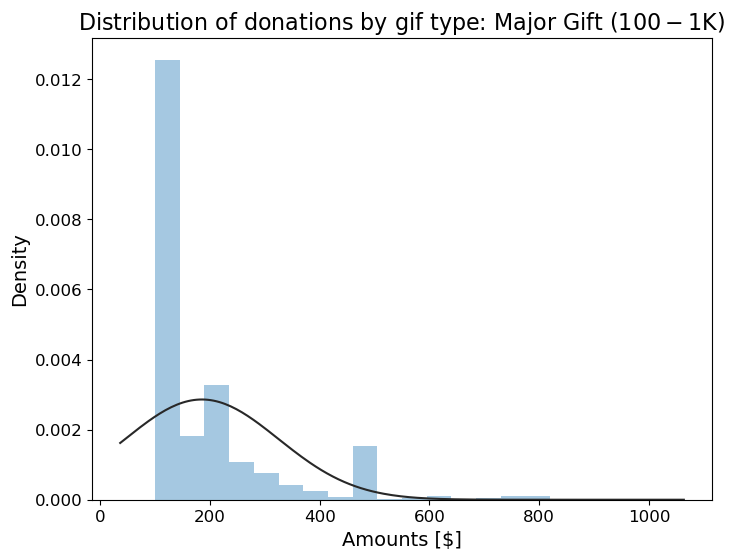

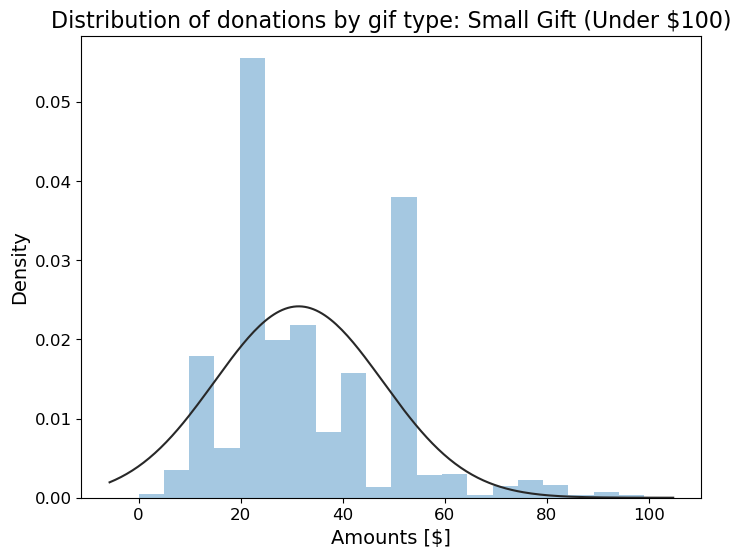

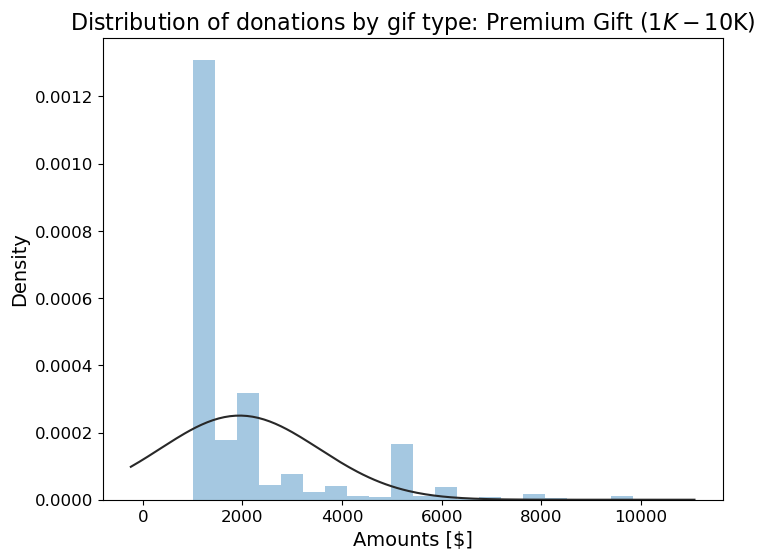

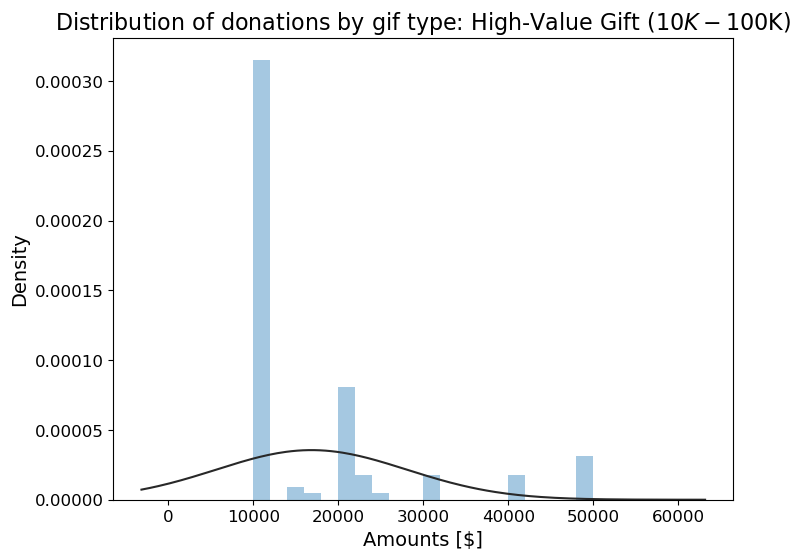

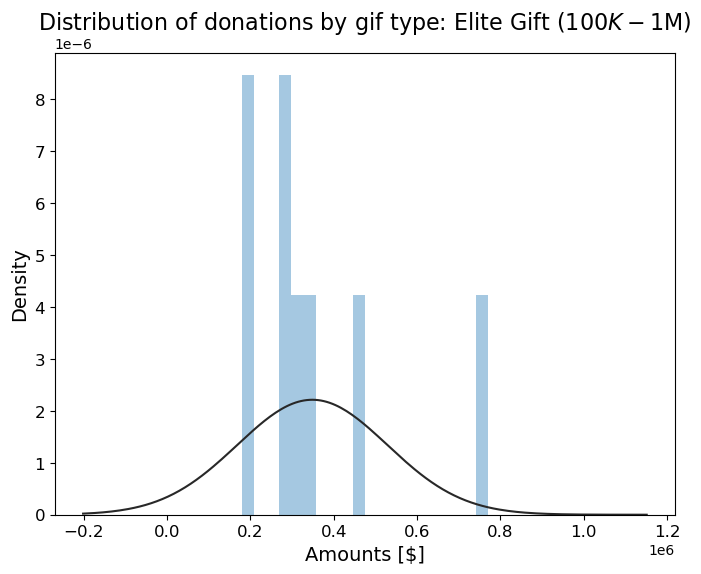

In [287]:

# Loop to chart amount in bins of types of gifts
for gift in gift_types:
    # Chart the distribution of amounts by bin gifts
    plt.figure(figsize=(8,6))
    df_test = df_trans_merge[(df_trans_merge['Gift Type'] == gift)] # | (df_trans_merge['Gift Type'] == 'Major Gift')]
    #df_test=df_trans_merge
    x=df_test['Amount']
    sns.distplot(x, bins=20, kde=False, fit=norm)
    plt.title(f'Distribution of donations by gif type: {gift}', fontsize=16)
    plt.xlabel('Amounts [$]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('Density', fontsize=14)
    plt.yticks(fontsize=12)
    plt.show()





In [288]:
df_trans_merge.dtypes

Contact ID                         object
Close Date                 datetime64[ns]
Payment Type                       object
Amount                            float64
Primary Campaign Source            object
Destination Code                   object
Gift Type                          object
Giving Seasonality                 object
day                                 int32
month                               int32
year                                int32
weekday                             int32
weekday_name                       object
week_of_year                       UInt32
quarter                             int32
is_weekend                           bool
Mailing City                       object
Mailing State                      object
Mailing Postal Code                object
Mailing Country                    object
Deceased                            int64
Do Not Contact                      int64
Age                               float64
Gender                            

In [289]:
df_trans_merge.columns.to_list()

['Contact ID',
 'Close Date',
 'Payment Type',
 'Amount',
 'Primary Campaign Source',
 'Destination Code',
 'Gift Type',
 'Giving Seasonality',
 'day',
 'month',
 'year',
 'weekday',
 'weekday_name',
 'week_of_year',
 'quarter',
 'is_weekend',
 'Mailing City',
 'Mailing State',
 'Mailing Postal Code',
 'Mailing Country',
 'Deceased',
 'Do Not Contact',
 'Age',
 'Gender',
 'RG Status',
 'BQ Status']

In [290]:
# Insert dataframe in postgres Write DataFrame to PostgreSQL table
df_trans_merge.to_sql('tbl_donations_donors', engine, schema='nonprofit', index=False, if_exists='replace')

607

## Categorical features

In [291]:
categorical_features = [
#'Contact ID',
 #'Close Date',
 'Payment Type',
 #'Amount',
 'Primary Campaign Source',
 'Destination Code',
 'Gift Type',
 'Giving Seasonality',
 'day',
 'month',
 'year',
 'weekday',
 'weekday_name',
 'week_of_year',
 'quarter',
 'is_weekend',
 'Mailing City',
 'Mailing State',
 'Mailing Postal Code',
 'Mailing Country',
 #'Deceased',
 #'Do Not Contact',
 #'Age',
 'Gender',
 'RG Status',
 'BQ Status']

In [292]:
df_categorical = (df_trans_merge.drop(columns=['Close Date', 'Amount', 'Age']))
df_categorical

,Contact ID,Payment Type,Primary Campaign Source,Destination Code,Gift Type,Giving Seasonality,day,month,year,weekday,...,is_weekend,Mailing City,Mailing State,Mailing Postal Code,Mailing Country,Deceased,Do Not Contact,Gender,RG Status,BQ Status
23952,007AA268063fYKp,Credit Card,2018 Christmas Appeal,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,12,11,2018,0,...,False,WEST RYDE,NSW,2114,Australia,1,1,Male,Unknown,No Gift
23959,007AA268063fYKp,Credit Card,2020 Autumn Newsletter,Direct Mail 4-1325,Small Gift (Under $100),Summer,10,2,2020,0,...,False,WEST RYDE,NSW,2114,Australia,1,1,Male,Unknown,No Gift
23958,007AA268063fYKp,Credit Card,2019 Christmas Appeal,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,15,11,2019,4,...,False,WEST RYDE,NSW,2114,Australia,1,1,Male,Unknown,No Gift
23957,007AA268063fYKp,Credit Card,2019 September Appeal,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,1,10,2019,1,...,False,WEST RYDE,NSW,2114,Australia,1,1,Male,Unknown,No Gift
23960,007AA268063fYKp,Credit Card,2020 Tax Appeal,Direct Mail 4-1325,Small Gift (Under $100),Winter,9,6,2020,1,...,False,WEST RYDE,NSW,2114,Australia,1,1,Male,Unknown,No Gift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,007zz7049975Alh,Cheque,General,General 4-1390,Small Gift (Under $100),Summer,28,2,2022,0,...,False,RUTHERFORD,NSW,2320,Australia,0,0,Male,Unknown,Unknown
2035,007zz7049975Alh,Cheque,2023 Donor Survey,General 4-1390,Small Gift (Under $100),Summer,16,2,2023,3,...,False,RUTHERFORD,NSW,2320,Australia,0,0,Male,Unknown,Unknown
2036,007zz7049975Alh,Unknown,2024 Spring Newsletter,Direct Mail 4-1325,Major Gift ($100-$1K),Spring,2,10,2024,2,...,False,RUTHERFORD,NSW,2320,Australia,0,0,Male,Unknown,Unknown
2032,007zz7049975Alh,Cheque,2020 Spring Newsletter,Direct Mail 4-1325,Small Gift (Under $100),Spring,2,11,2020,0,...,False,RUTHERFORD,NSW,2320,Australia,0,0,Male,Unknown,Unknown


In [293]:
df_categorical.columns

Index(['Contact ID', 'Payment Type', 'Primary Campaign Source',
       'Destination Code', 'Gift Type', 'Giving Seasonality', 'day', 'month',
       'year', 'weekday', 'weekday_name', 'week_of_year', 'quarter',
       'is_weekend', 'Mailing City', 'Mailing State', 'Mailing Postal Code',
       'Mailing Country', 'Deceased', 'Do Not Contact', 'Gender', 'RG Status',
       'BQ Status'],
      dtype='object')

In [294]:
df_categorical['Payment Type'].unique()

array(['Credit Card', 'Cheque', 'Unknown', 'Cash',
       'Direct Deposit Stripe', 'Direct Deposit', 'Direct Debit',
       'POST Billpay'], dtype=object)

## One-hot encode for categorical features

In [295]:
# Identify the categorical columns for encoding
categorical_cols = ['Payment Type', 'Primary Campaign Source',
       'Destination Code', 'Gift Type', 'Giving Seasonality', 'day', 'month',
       'year', 'weekday', 'weekday_name', 'week_of_year', 'quarter',
       'is_weekend', 'Mailing City', 'Mailing State', 'Mailing Postal Code',
       'Mailing Country', 'Deceased', 'Do Not Contact', 'Gender', 'RG Status',
       'BQ Status']

# Apply one-hot encoding
df_categorical_encoded = pd.get_dummies(df_categorical, columns=categorical_cols)

# Aggregate by 'donor_id' to ensure one row per donor_id
# For the one-hot encoded columns, use max() to indicate presence
df_categorical_encoded_by_donor = df_categorical_encoded.groupby('Contact ID').agg({
    #'donation_amount': 'sum',  # Example aggregation for donation amount
    **{col: 'max' for col in df_categorical_encoded.columns if col not in ['Contact ID']}
}).reset_index()

# Display the result
df_categorical_encoded_by_donor

,Contact ID,Payment Type_Cash,Payment Type_Cheque,Payment Type_Credit Card,Payment Type_Direct Debit,Payment Type_Direct Deposit,Payment Type_Direct Deposit Stripe,Payment Type_POST Billpay,Payment Type_Unknown,Primary Campaign Source_2018 Christmas Appeal,...,BQ Status_Intending,BQ Status_No Gift,BQ Status_No Will,BQ Status_No longer interested,BQ Status_Not at this time,BQ Status_Not ever,BQ Status_Prospect,BQ Status_Realised gift,BQ Status_Unexpected gift,BQ Status_Unknown
0,007AA268063fYKp,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,007AA754570zPmu,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,007AA784463ooXS,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,007AA805433m3R3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,007AB069796EOr2,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,007zz238695YiZi,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8308,007zz4618235XEg,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8309,007zz522481LlSw,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8310,007zz7049975Alh,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [296]:
df_cat_encode_final = df_categorical_encoded_by_donor
df_cat_encode_final = df_cat_encode_final.drop(columns=['Contact ID'])
df_cat_encode_final

,Payment Type_Cash,Payment Type_Cheque,Payment Type_Credit Card,Payment Type_Direct Debit,Payment Type_Direct Deposit,Payment Type_Direct Deposit Stripe,Payment Type_POST Billpay,Payment Type_Unknown,Primary Campaign Source_2018 Christmas Appeal,Primary Campaign Source_2018 Christmas Crowdfunding,...,BQ Status_Intending,BQ Status_No Gift,BQ Status_No Will,BQ Status_No longer interested,BQ Status_Not at this time,BQ Status_Not ever,BQ Status_Prospect,BQ Status_Realised gift,BQ Status_Unexpected gift,BQ Status_Unknown
0,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8308,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8309,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8310,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


## Numerical features

In [297]:

# Sort data by Contact ID and Close Date to calculate time differences correctly
df_trans_tbl = df_trans_merge.sort_values(['Contact ID', 'Close Date'])

df_numerical = df_trans_tbl.groupby('Contact ID', group_keys=False).apply(lambda group: pd.Series({
    'days_since_last_donation': (group['Close Date'].max() - group['Close Date']).dt.days.iloc[-1],
    'months_since_last_donation': (group['Close Date'].max() - group['Close Date']).dt.days.iloc[-1] // 30,
    'tenure_in_months': (group['Close Date'].max() - group['Close Date'].min()).days // 30,
    'avg_days_between_donations': group['Close Date'].diff().dt.days.mean() if group['Close Date'].count() > 1 else -1,
    
    'min_amount': group['Amount'].min(),
    'max_amount': group['Amount'].max(),
    'avg_amount': group['Amount'].mean(),
    'median_amount': group['Amount'].median(),
    
    # Features for Clustering analysis
    'frequency': group['Close Date'].count(), # Count donations by donor
    'recency': (report_data - group['Close Date'].max()).days,
    'total_donation': group['Amount'].sum(), # 
    
    # Donations dates
    'first_donation_date':group['Close Date'].min(),
    'last_donation_date':group['Close Date'].max(),
    
    # New fields added below
    'Loyal Donor Indicator': int(group['Close Date'].dt.year.nunique() >= 2),  # 1 if donated in multiple years
    'Retention Rate': (group['Close Date'].dt.year.nunique() / group['Close Date'].dt.year.max()) if group['Close Date'].dt.year.max() else 0,
    'Churn Rate': 1 - ((group['Close Date'].dt.year.nunique() / group['Close Date'].dt.year.max()) if group['Close Date'].dt.year.max() else 0),
    'Year-over-Year Donation Growth': group['Amount'].pct_change().dropna().mean() if group['Amount'].count() > 1 else 0,  # Average YoY growth rate in amount
    #'Lifetime Value (LTV)': group['Amount'].sum(),  # Total donations as LTV
    'Projected Donor Tenure (years)': (group['Close Date'].max() - group['Close Date'].min()).days / 365,
    

})).reset_index()

# Display the summary DataFrame
df_numerical.tail()

,Contact ID,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years)
8307,007zz238695YiZi,0,0,15,30.466667,17.0,170.0,112.625,170.0,16,1837,1802.0,2018-07-15,2019-10-15,1,0.000991,0.999009,0.600000,1.252055
8308,007zz4618235XEg,0,0,0,-1.000000,50.0,50.0,50.000,50.0,1,1807,50.0,2019-11-14,2019-11-14,0,0.000495,0.999505,0.000000,0.000000
8309,007zz522481LlSw,0,0,3,97.000000,25.0,35.0,30.000,30.0,2,702,60.0,2022-08-18,2022-11-23,0,0.000495,0.999505,0.400000,0.265753
8310,007zz7049975Alh,0,0,53,320.800000,25.0,100.0,47.500,40.0,6,23,285.0,2020-05-12,2024-10-02,1,0.002470,0.997530,0.361667,4.394521
8311,007zz8074834kSl,0,0,0,-1.000000,50.0,50.0,50.000,50.0,1,1211,50.0,2021-07-02,2021-07-02,0,0.000495,0.999505,0.000000,0.000000


In [298]:
df_numerical.columns

Index(['Contact ID', 'days_since_last_donation', 'months_since_last_donation',
       'tenure_in_months', 'avg_days_between_donations', 'min_amount',
       'max_amount', 'avg_amount', 'median_amount', 'frequency', 'recency',
       'total_donation', 'first_donation_date', 'last_donation_date',
       'Loyal Donor Indicator', 'Retention Rate', 'Churn Rate',
       'Year-over-Year Donation Growth', 'Projected Donor Tenure (years)'],
      dtype='object')

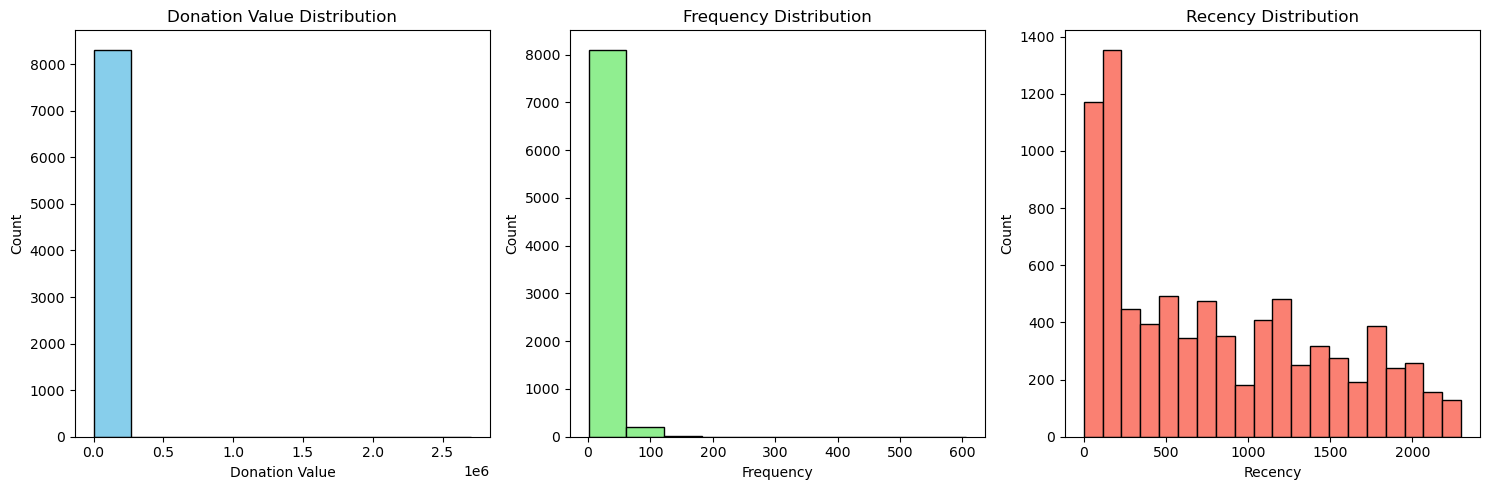

In [299]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_numerical['total_donation'], bins=10, color='skyblue', edgecolor='black')
plt.title('Donation Value Distribution')
plt.xlabel('Donation Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df_numerical['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df_numerical['recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

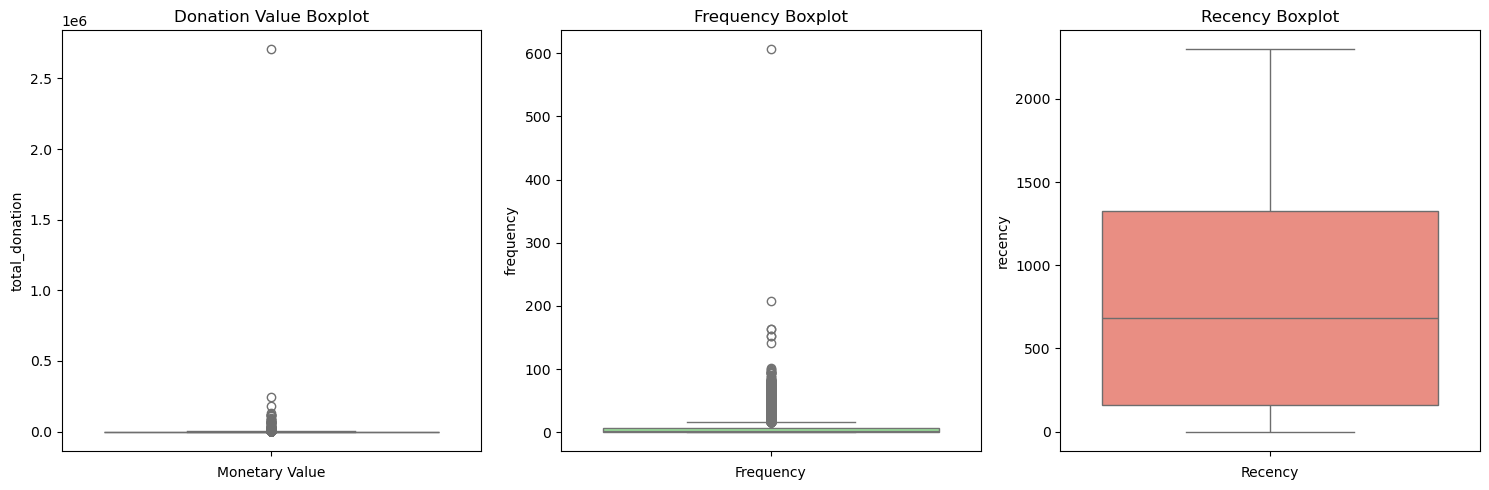

In [300]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_numerical['total_donation'], color='skyblue')
plt.title('Donation Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_numerical['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_numerical['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [301]:
M_Q1 = df_numerical["total_donation"].quantile(0.25)
M_Q3 = df_numerical["total_donation"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

donations_outliers_df = df_numerical[(df_numerical["total_donation"] > (M_Q3 + 1.5 * M_IQR)) | (df_numerical["total_donation"] < (M_Q1 - 1.5 * M_IQR))].copy()

donations_outliers_df.describe()

,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years)
count,1009.0,1009.0,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,0.0,0.0,55.215064,163.734173,611.175352,2408.165738,1147.297323,1084.616155,29.187314,277.247770,8.564119e+03,2019-06-26 22:07:15.282457856,2024-01-21 18:03:12.666006016,0.968285,0.002647,0.997353,0.996803,4.574878
min,0.0,0.0,0.000000,-1.000000,0.010000,15.000000,12.473684,10.000000,1.000000,1.000000,1.120000e+03,2018-07-01 00:00:00,2018-11-12 00:00:00,0.000000,0.000494,0.996542,-0.872340,0.000000
25%,0.0,0.0,46.000000,31.750000,30.000000,100.000000,50.257732,50.000000,7.000000,22.000000,1.500000e+03,2018-10-02 00:00:00,2024-01-01 00:00:00,1.000000,0.001979,0.996542,0.000000,3.791781
50%,0.0,0.0,61.000000,112.928571,80.000000,300.000000,150.000000,100.000000,15.000000,120.000000,2.150000e+03,2018-12-19 00:00:00,2024-06-27 00:00:00,1.000000,0.002964,0.997036,0.062760,5.049315
75%,0.0,0.0,70.000000,228.666667,200.000000,1000.000000,460.000000,450.000000,51.000000,298.000000,4.050000e+03,2019-10-13 00:00:00,2024-10-03 00:00:00,1.000000,0.003458,0.998021,0.247694,5.808219
max,0.0,0.0,76.000000,1825.000000,180000.000000,770000.000000,245914.818182,270000.000000,606.000000,2174.000000,2.705063e+06,2024-10-02 00:00:00,2024-10-24 00:00:00,1.000000,0.003458,0.999506,124.812500,6.301370
std,0.0,0.0,19.442741,173.340355,5965.520103,25366.469618,9897.107937,10469.806957,33.914950,422.587135,8.648054e+04,NaN,NaN,0.175326,0.000826,0.000826,7.609937,1.598143


In [302]:
F_Q1 = df_numerical['frequency'].quantile(0.25)
F_Q3 = df_numerical['frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = df_numerical[(df_numerical['frequency'] > (F_Q3 + 1.5 * F_IQR)) | (df_numerical['frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years)
count,892.0,892.0,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892,892,892.000000,892.000000,892.000000,892.000000,892.000000
mean,0.0,0.0,55.686099,52.810214,34.592836,261.157365,58.046797,48.510392,42.328475,235.288117,2578.502085,2019-07-24 16:06:59.730941952,2024-03-03 17:05:06.726457344,0.996637,0.002709,0.997291,0.171242,4.613809
min,0.0,0.0,0.000000,1.354839,0.010000,5.000000,3.352941,2.000000,17.000000,1.000000,57.000000,2018-07-01 00:00:00,2019-11-01 00:00:00,0.000000,0.000494,0.996542,-0.069118,0.079452
25%,0.0,0.0,42.000000,30.449025,20.000000,25.000000,20.000000,20.000000,22.000000,17.000000,672.500000,2018-09-01 00:00:00,2024-03-13 18:00:00,1.000000,0.001978,0.996542,0.000000,3.505479
50%,0.0,0.0,63.000000,32.661905,20.000000,50.000000,30.000000,30.000000,32.000000,24.000000,1192.500000,2018-12-17 12:00:00,2024-10-01 00:00:00,1.000000,0.002964,0.997036,0.017232,5.195890
75%,0.0,0.0,72.000000,78.333333,40.000000,120.000000,51.075650,50.000000,60.000000,225.250000,2112.500000,2020-03-01 00:00:00,2024-10-08 00:00:00,1.000000,0.003458,0.998022,0.077108,5.936986
max,0.0,0.0,76.000000,137.625000,500.000000,50000.000000,2908.235294,1000.000000,606.000000,1820.000000,245255.160000,2023-09-18 00:00:00,2024-10-24 00:00:00,1.000000,0.003458,0.999506,40.935297,6.301370
std,0.0,0.0,19.141276,32.761038,43.295244,1935.981743,139.566613,77.794226,30.580004,399.034720,9933.158496,NaN,NaN,0.057928,0.000791,0.000791,1.516812,1.572093


In [303]:
non_outliers_df = df_numerical[(~df_numerical.index.isin(donations_outliers_df.index)) & (~df_numerical.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years)
count,6882.0,6882.0,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882,6882,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000
mean,0.0,0.0,16.398285,180.898541,59.217339,80.321261,68.244267,66.978059,3.150538,908.284656,185.029289,2020-12-17 05:37:17.837837824,2022-04-30 17:10:05.754141184,0.489102,0.001038,0.998962,0.114278,1.368441
min,0.0,0.0,0.000000,-1.000000,0.500000,1.000000,0.833333,1.000000,1.000000,0.000000,2.000000,2018-07-01 00:00:00,2018-07-12 00:00:00,0.000000,0.000494,0.996542,-0.980000,0.000000
25%,0.0,0.0,0.000000,-1.000000,20.000000,25.000000,25.000000,25.000000,1.000000,317.000000,40.000000,2019-05-29 00:00:00,2020-11-30 00:00:00,0.000000,0.000495,0.998518,0.000000,0.000000
50%,0.0,0.0,5.000000,60.500000,35.000000,50.000000,47.000000,50.000000,2.000000,802.000000,100.000000,2020-07-21 00:00:00,2022-08-15 00:00:00,0.000000,0.000496,0.999504,0.000000,0.419178
75%,0.0,0.0,29.000000,277.916667,50.000000,100.000000,75.000000,75.000000,4.000000,1425.000000,234.500000,2022-08-11 00:00:00,2023-12-13 00:00:00,1.000000,0.001482,0.999505,0.063125,2.410274
max,0.0,0.0,75.000000,2119.000000,1050.000000,1050.000000,1050.000000,1050.000000,16.000000,2297.000000,1111.800000,2024-10-21 00:00:00,2024-10-25 00:00:00,1.000000,0.003458,0.999506,16.016667,6.197260
std,0.0,0.0,21.569102,272.568751,87.834103,105.763160,91.478867,91.164981,3.165219,658.097662,225.034418,NaN,NaN,0.499918,0.000747,0.000747,0.535413,1.787009


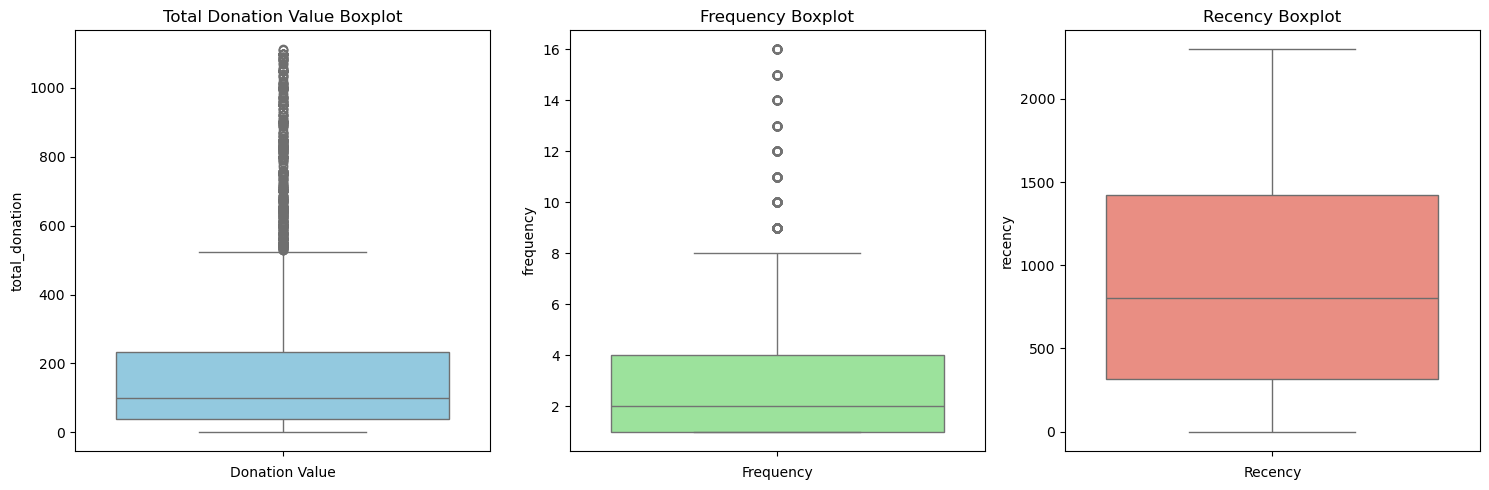

In [304]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['total_donation'], color='skyblue')
plt.title('Total Donation Value Boxplot')
plt.xlabel('Donation Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

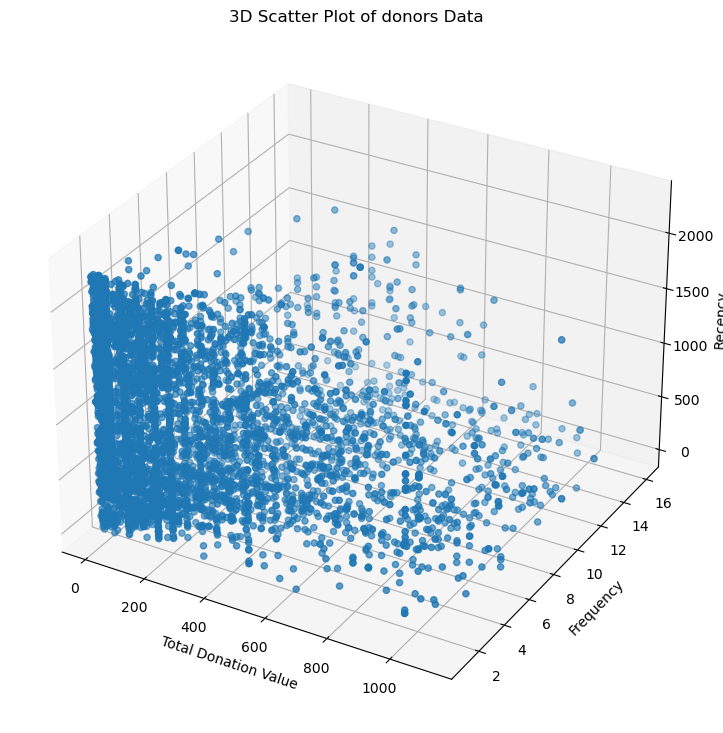

In [305]:
fig = plt.figure(figsize=(15, 9))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["total_donation"], non_outliers_df["frequency"], non_outliers_df["recency"])

ax.set_xlabel('Total Donation Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of donors Data')

plt.show()

In [306]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["total_donation", "frequency", "recency"]])

scaled_data

array([[ 2.84408588,  2.16413497,  0.90223461],
       [-0.71118418, -0.67947723,  1.87480531],
       [-0.71118418, -0.67947723,  1.63318227],
       ...,
       [-0.55564111, -0.36352032, -0.31347877],
       [ 0.44427859,  0.90030733, -1.34531549],
       [-0.60008199, -0.67947723,  0.46001887]])

In [307]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("total_donation", "frequency", "recency"))

scaled_data_df

,total_donation,frequency,recency
0,2.844086,2.164135,0.902235
1,-0.711184,-0.679477,1.874805
3,-0.711184,-0.679477,1.633182
4,-0.377878,-0.679477,1.002531
5,1.110892,0.584350,-0.378823
...,...,...,...
8305,-0.600082,-0.679477,1.466022
8308,-0.600082,-0.679477,1.365725
8309,-0.555641,-0.363520,-0.313479
8310,0.444279,0.900307,-1.345315


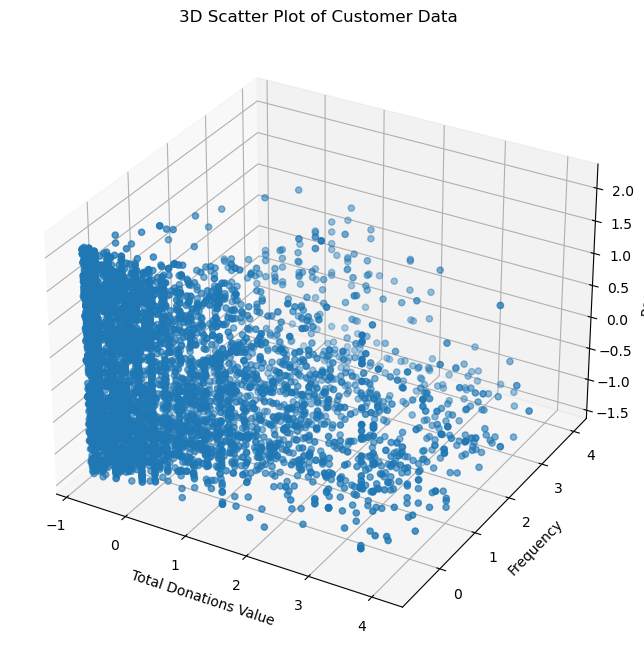

In [308]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["total_donation"], scaled_data_df["frequency"], scaled_data_df["recency"])

ax.set_xlabel('Total Donations Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [309]:
# Insert dataframe in postgres Write DataFrame to PostgreSQL table
df_numerical.to_sql('tbl_num_feat_by_donor', engine, schema='nonprofit', index=False, if_exists='replace')

312

## KMeans Clustering

/Users/jamesmontoya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesmontoya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesmontoya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesmontoya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/

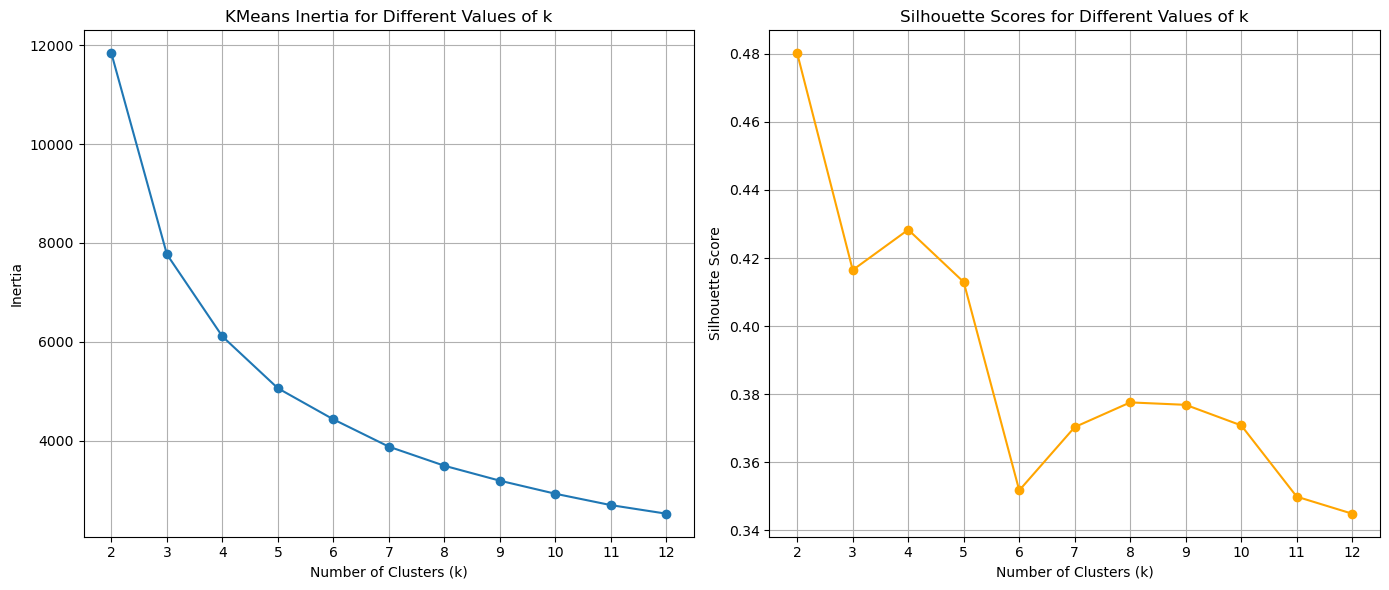

In [310]:

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [327]:
non_outliers_df = non_outliers_df.drop(columns=['Cluster'])

In [328]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

/Users/jamesmontoya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, ..., 1, 2, 0], dtype=int32)

In [329]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Contact ID,days_since_last_donation,months_since_last_donation,tenure_in_months,avg_days_between_donations,min_amount,max_amount,avg_amount,median_amount,frequency,recency,total_donation,first_donation_date,last_donation_date,Loyal Donor Indicator,Retention Rate,Churn Rate,Year-over-Year Donation Growth,Projected Donor Tenure (years),Cluster
0,007AA268063fYKp,0,0,22,74.666667,50.0,110.0,82.5,100.0,10,1502,825.0,2018-11-12,2020-09-14,1,0.001485,0.998515,0.108081,1.841096,2
1,007AA754570zPmu,0,0,0,-1.000000,25.0,25.0,25.0,25.0,1,2142,25.0,2018-12-14,2018-12-14,0,0.000496,0.999504,0.000000,0.000000,0
3,007AA805433m3R3,0,0,0,-1.000000,25.0,25.0,25.0,25.0,1,1983,25.0,2019-05-22,2019-05-22,0,0.000495,0.999505,0.000000,0.000000,0
4,007AB069796EOr2,0,0,0,-1.000000,100.0,100.0,100.0,100.0,1,1568,100.0,2020-07-10,2020-07-10,0,0.000495,0.999505,0.000000,0.000000,0
5,007AB214389vnBQ,0,0,48,365.500000,35.0,100.0,87.0,100.0,5,659,435.0,2019-01-04,2023-01-05,1,0.001977,0.998023,-0.162500,4.005479,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8305,007zy978877cY7Q,0,0,0,-1.000000,50.0,50.0,50.0,50.0,1,1873,50.0,2019-09-09,2019-09-09,0,0.000495,0.999505,0.000000,0.000000,0
8308,007zz4618235XEg,0,0,0,-1.000000,50.0,50.0,50.0,50.0,1,1807,50.0,2019-11-14,2019-11-14,0,0.000495,0.999505,0.000000,0.000000,0
8309,007zz522481LlSw,0,0,3,97.000000,25.0,35.0,30.0,30.0,2,702,60.0,2022-08-18,2022-11-23,0,0.000495,0.999505,0.400000,0.265753,1
8310,007zz7049975Alh,0,0,53,320.800000,25.0,100.0,47.5,40.0,6,23,285.0,2020-05-12,2024-10-02,1,0.002470,0.997530,0.361667,4.394521,2


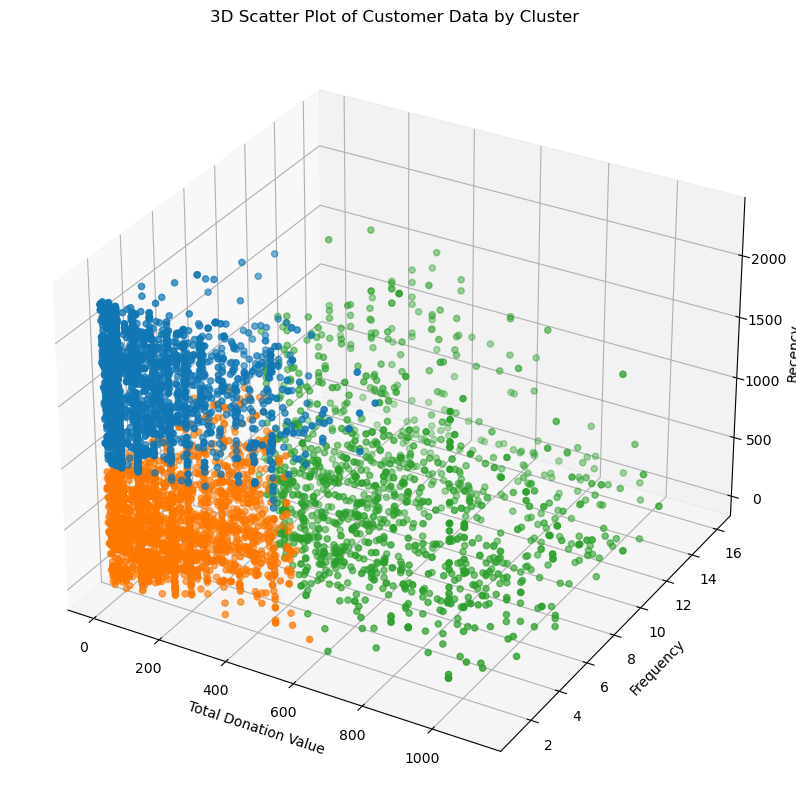

In [330]:
# Define cluster colors
cluster_colors = {0: '#1177b4', 1: '#ff7700', 2: '#2ca02c', 3: '#d62728'}  # Add all necessary clusters

# Map colors to clusters and handle NaN
colors = non_outliers_df['Cluster'].map(cluster_colors).fillna('#808080').tolist()  # Default gray for NaN

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df['total_donation'],  # X-axis
    non_outliers_df['frequency'],       # Y-axis
    non_outliers_df['recency'],         # Z-axis
    c=colors,                           # Colors mapped from clusters
    marker='o'
)

# Set axis labels and title
ax.set_xlabel('Total Donation Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

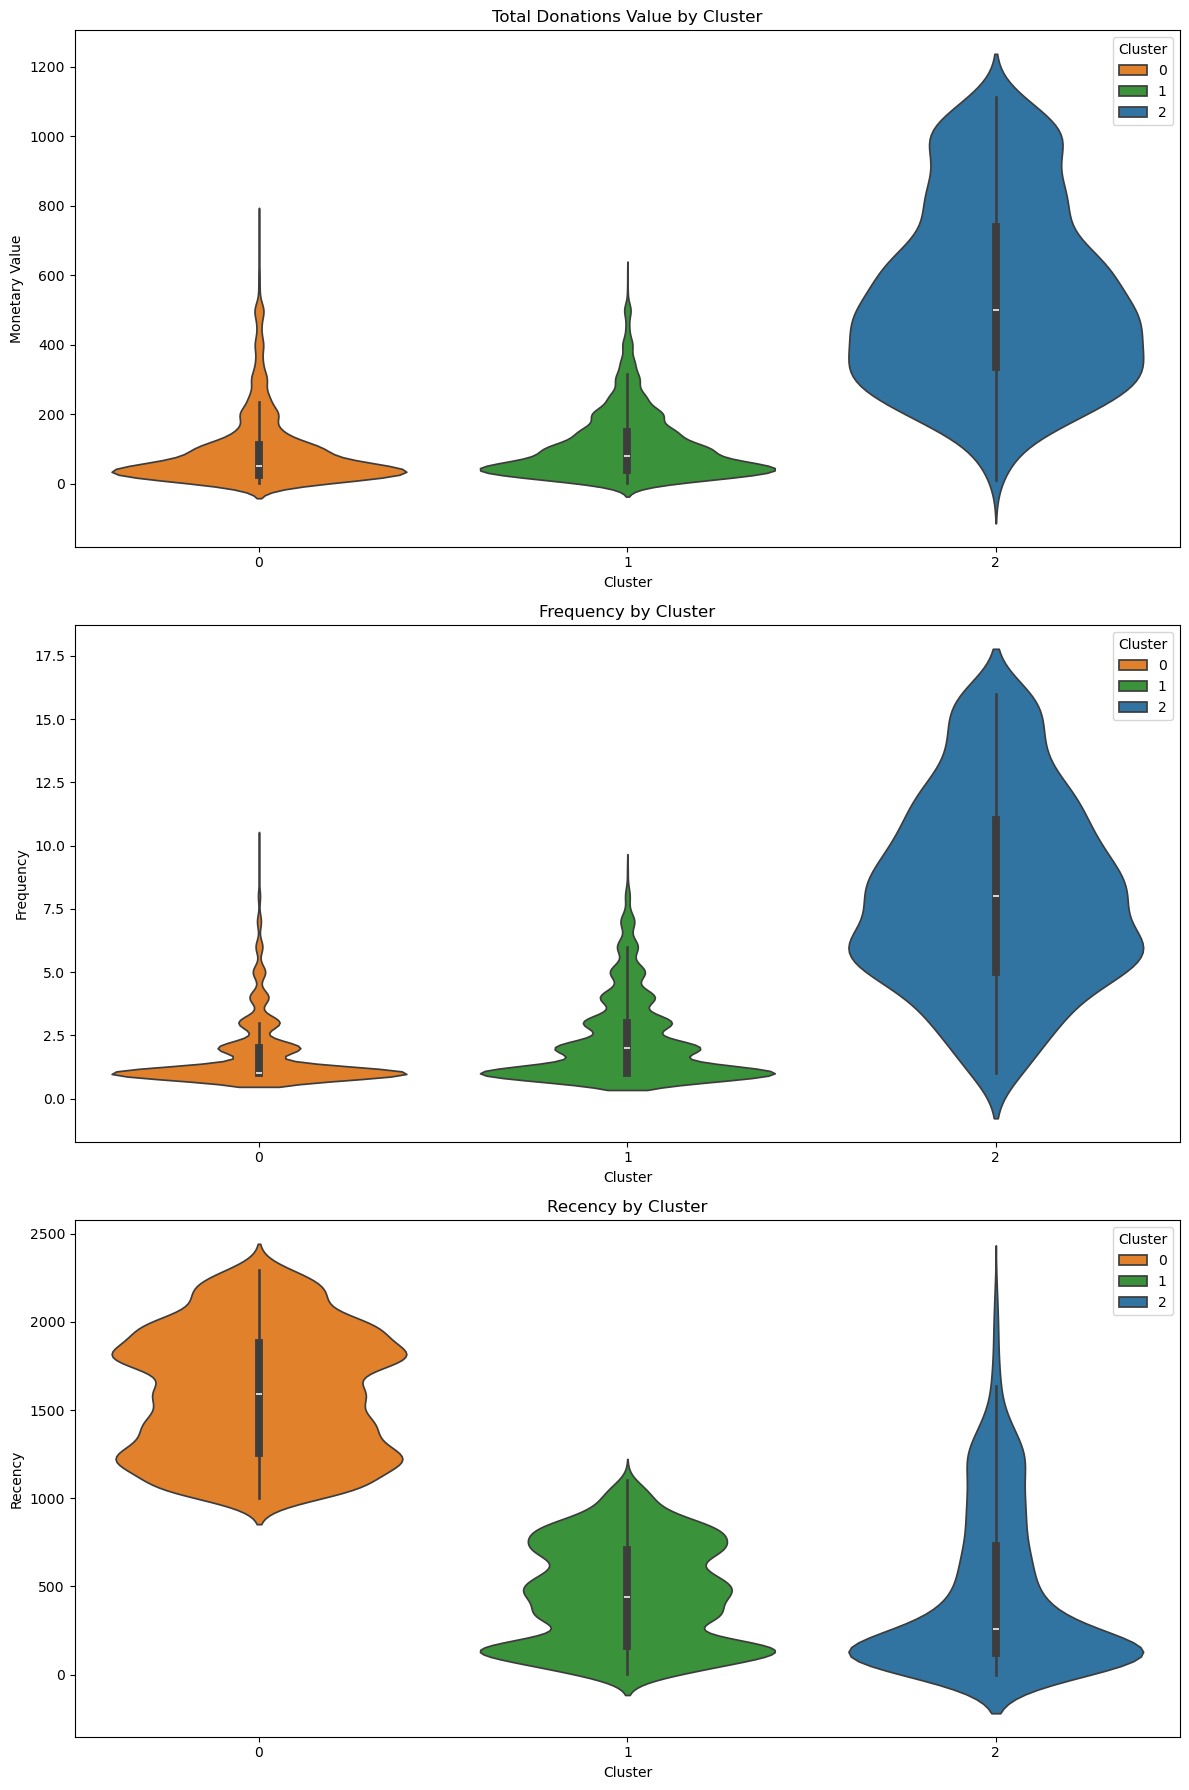

In [331]:
# Ensure cluster_colors includes all clusters
unique_clusters = non_outliers_df['Cluster'].unique()
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, sns.color_palette("tab10", len(unique_clusters)))}

# Plot
plt.figure(figsize=(12, 18))

# Plot 1: Total Donations Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['total_donation'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Total Donations Value by Cluster')
plt.ylabel('Monetary Value')

# Plot 2: Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot 3: Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()